In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on wed Jul 29 08:23:27 2020

@author: zaigham
"""


#Import the libraries
import math
from datetime import datetime
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

ModuleNotFoundError: No module named 'tensorflow'

In [21]:
df = pd.read_csv("tsl_data.csv") 
print(df.head())
print(df.shape)

Date    Open    High     Low   Close  Volume
0  2015-01-02 19:30:00  222.61  222.99  222.44  222.44     960
1  2015-01-02 19:35:00  222.00  222.39  221.42  222.06    1786
2  2015-01-02 19:40:00  221.83  221.85  221.19  221.49    1650
3  2015-01-02 19:45:00  221.33  221.68  219.59  220.06    2289
4  2015-01-02 19:50:00  220.05  220.05  218.33  218.33    1500
(100699, 6)


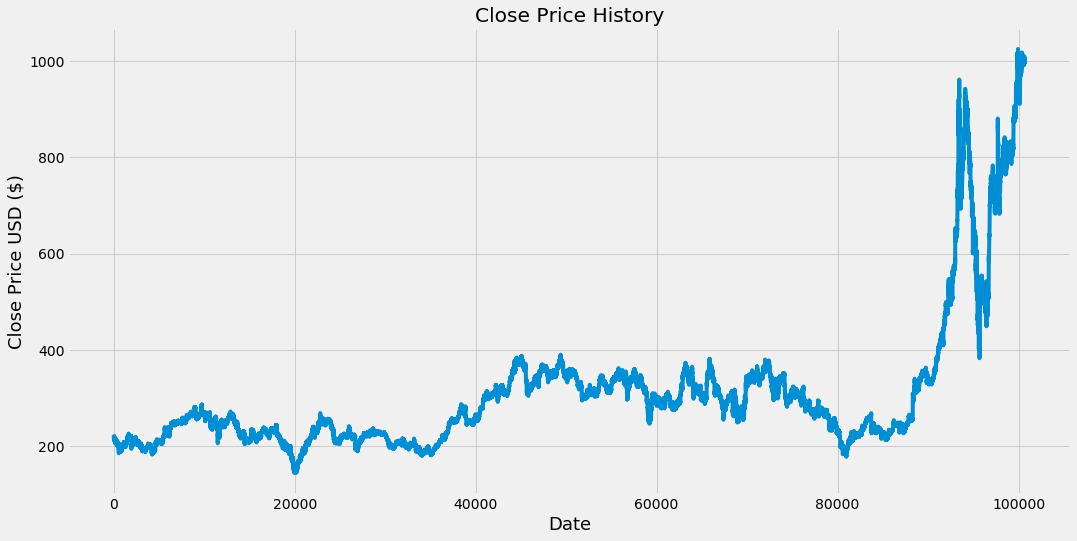

In [22]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [23]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Open', 'High', 'Low', 'Volume', 'Close'])

In [24]:
data.head()

,Open,High,Low,Volume,Close
0,222.61,222.99,222.44,960,222.44
1,222.00,222.39,221.42,1786,222.06
2,221.83,221.85,221.19,1650,221.49
3,221.33,221.68,219.59,2289,220.06
4,220.05,220.05,218.33,1500,218.33


In [25]:
#Converting the dataframe to a numpy array
dataset = data.values

In [26]:
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.95)

In [27]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [28]:
print(dataset[1])
print(dataset[1, 4])

[ 222.    222.39  221.42 1786.    222.06]
222.06


In [29]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,:])
    y_train.append(train_data[i,4])

In [30]:

#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [31]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],5))


In [32]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test = []
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,:])
    y_test.append(test_data[i,4])

In [33]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [34]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],5))

In [35]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],5)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [36]:
#Compile the model
model.compile(optimizer='adam', loss='mae')

In [18]:
#Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=30)

NameError: name 'x_train' is not defined

In [19]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions.shape


KeyboardInterrupt



In [22]:
# predictions = scaler.inverse_transform(predictions)#Undo scaling
# create empty table with 12 fields
trainPredict_dataset_like = np.zeros(shape=(len(predictions), 5) )
# put the predicted values in the right field
trainPredict_dataset_like[:,0] = predictions[:,0]
# inverse transform and then select the right field
predictions = scaler.inverse_transform(trainPredict_dataset_like)[:,0]

In [23]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
print(rmse)

776.3905808214656


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


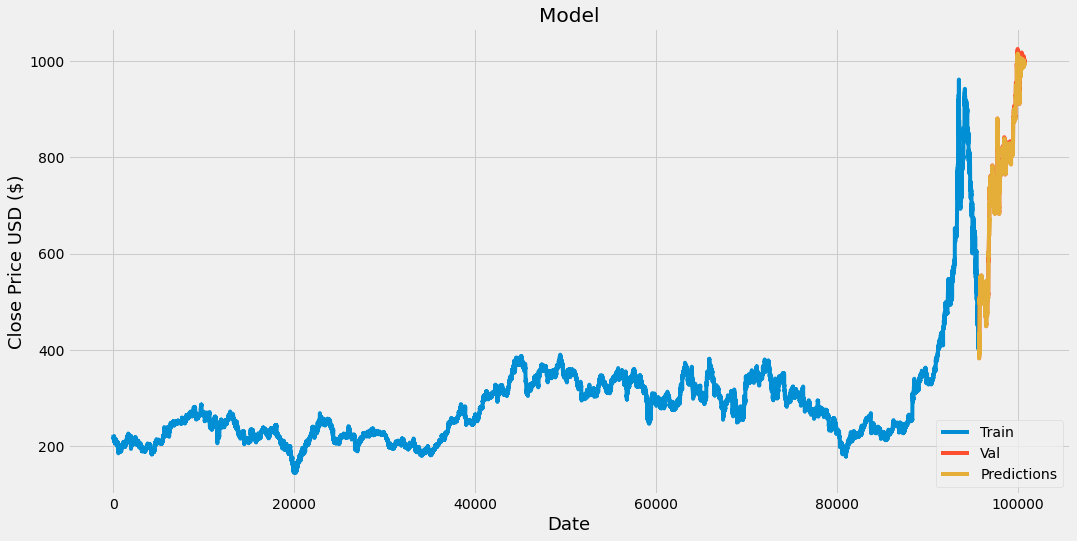

In [24]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [25]:
#Show the valid and predicted prices
print(valid)

            Open      High       Low  Volume     Close  Predictions
95665    429.720   431.545   428.150    3214   431.125   429.749155
95666    431.400   434.640   431.290   27776   432.830   431.135505
95667    432.660   432.920   426.820    7953   427.120   432.816268
95668    426.250   431.435   424.790    3607   427.660   427.485206
95669    427.585   427.585   423.445    4811   424.580   428.169235
...          ...       ...       ...     ...       ...          ...
100694   999.710  1000.830   999.710    1183  1000.030   993.703904
100695   999.840  1002.160   999.840    2750  1001.300   993.570482
100696  1002.100  1002.820  1001.730    3888  1001.730   994.609968
100697   999.300   999.300   999.300     100   999.300   995.002800
100698   995.540   995.540   995.540     101   995.540   993.204324

[5034 rows x 6 columns]


In [26]:
model.save('all-features.h5')